### We going to create the feature, and visualize the profit by and total profit by each month in years

In [39]:
print ("This is the first notebooks, of all times")

This is the first notebooks, of all times


In [40]:
%pip install numpy
%pip install pandas
%pip install matplotlib

You should consider upgrading via the '/Users/dinachat/Documents/Python/class-2024-master/Scatter-Plot/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/dinachat/Documents/Python/class-2024-master/Scatter-Plot/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/dinachat/Documents/Python/class-2024-master/Scatter-Plot/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Pull Data from file, folder uploads, which is the data we will visualize latter

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv('./uploads/Financial.csv')

In [42]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",6/1/2014,6,June,2014


### Doing Preprocessing Data, rename column, cast converting, and Fill missing data

In [46]:
df = df.reset_index(drop=True)
old_col = df.columns.tolist()
new_col = {}
for i in old_col:
    new_str = re.sub(r'\s+', '_', i.lstrip('_').rstrip('_'))
    new_col[i] = new_str    

# update column name, cause existing data having space, so convert to snake case value
# Example: Discount Band -> Discount_Band
df.rename(columns=new_col, inplace=True)

# Convert string to numerical value, existing data has dollar sign and unnecessarily value (string) $3,000.00 -> (float) 3000.00
df['Profit'] = df['Profit'].replace(r'[\s\-$()-,]', '', regex=True)
df['Profit'] = pd.to_numeric(df['Profit'], downcast='float')
df['Profit'] = df['Profit'].fillna(0)
df['Year_Month'] = df['Year'] + df['Month_Number']*0.1

# Sort by month number value
df1 = df.sort_values(by='Year_Month', ascending=True)
# Set the index to year_month easier to group
df1.set_index(['Year_Month'], inplace=True)
# group the same month together by summation of profit
# df1 = df1.groupby(by='Year_Month').sum('Cumulative_Profit')
# The Final result should group by numerical value, 
# Keys to take are Year_Month and Cumulative Profit, which is the additional value of Profit Each Year
df1.head()

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year
Year_Month,,,,,,,,,,,,,,,,
2013.9,Channel Partners,France,VTT,Medium,2234.0,$250.00,$12.00,"$26,808.00","$2,412.72","$24,395.28","$6,702.00",17693.28,9/1/2013,9,September,2013
2013.9,Midmarket,France,Paseo,None,549.0,$10.00,$15.00,"$8,235.00",$-,"$8,235.00","$5,490.00",2745.00,9/1/2013,9,September,2013
2013.9,Enterprise,Mexico,Amarilla,High,947.0,$260.00,$125.00,"$118,375.00","$13,021.25","$105,353.75","$113,640.00",8286.25,9/1/2013,9,September,2013
2013.9,Channel Partners,Mexico,VTT,High,1005.0,$250.00,$12.00,"$12,060.00","$1,326.60","$10,733.40","$3,015.00",7718.40,9/1/2013,9,September,2013
2013.9,Small Business,Germany,Paseo,Medium,1123.0,$10.00,$300.00,"$336,900.00","$23,583.00","$313,317.00","$280,750.00",32567.00,9/1/2013,9,September,2013


In [48]:
# group the same month together by summation of profit
df1 = df1.groupby(by='Year_Month').sum('Profit')

# Calculate cumulative of the profit, meaning previous month plus the current month
df1['Cumulative_Profit'] = df1['Profit'].cumsum()
# The Final result should group by numerical value, 
# Keys to take are Year_Month and Cumulative Profit, which is the additional value of Profit Each Year
df1

,Units_Sold,Profit,Month_Number,Year,Cumulative_Profit
Year_Month,,,,,
2013.9,50601.0,861525.53,315,70455,861525.53
2014.0,95622.0,1661315.10,700,140910,2522840.63
2014.1,133316.5,1850820.99,420,140945,4373661.62
2014.2,108085.0,2093013.97,490,140945,6466675.59
2014.3,53420.0,694449.37,105,70490,7161124.96
2014.4,78886.5,981667.08,140,70490,8142792.04
2014.5,51771.0,942270.06,175,70490,9085062.10
2014.6,103302.0,1544988.82,420,140980,10630050.92
2014.7,69349.0,959280.69,245,70490,11589331.61


### Visualization Data

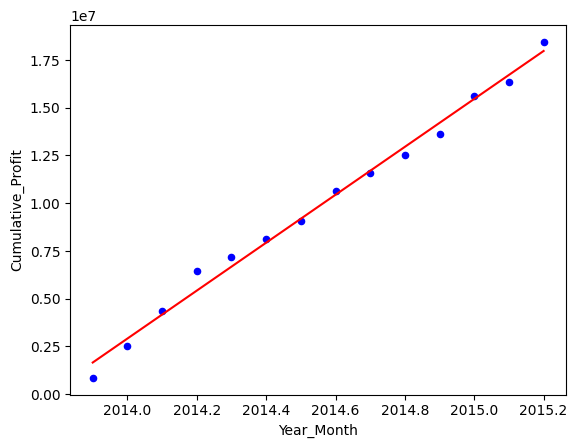

In [49]:
import numpy as np

xPlotKey = 'Year_Month'
yPlotKey = 'Cumulative_Profit'
# reset index
df1 = df1.reset_index();
# Display scatter point in the graph
plot_lines = df1.plot.scatter(x=xPlotKey,  y=yPlotKey, color='blue')  # 's' controls the size of
# Calculate line function
x= np.array(df1[xPlotKey].tolist())
y = np.array(df1[yPlotKey].tolist())
m, b = np.polyfit(x, y, 1)

plot_lines.plot(x, m*x + b, 'red')

